In [1]:
!pip install yfinance
!pip install yahoofinancials


  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15190 sha256=150bd3b1b02db9a8e689e009641205fa323e4725072ac1d242b13765c559311b
  Stored in directory: c:\users\kmorozov\appdata\local\pip\cache\wheels\6a\90\0c\08c7ac2ce60b9ac91529417d471e59244f9f96848c86f14809
Successfully built yahoofinancials


In [1]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1)
import seaborn as sns
plt.style.use('fivethirtyeight') 
plt.rcParams["figure.figsize"] = 10,5
##plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [2]:
aapl_df = yf.download('AAPL', 
                      start='2010-01-01', 
                      end='2021-06-12', 
                      progress=False,
)
aapl_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,7.611786,7.619643,7.520000,7.526071,6.452591,352410800
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.553024,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.564355,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.459939,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.447998,477131200


In [3]:
y = aapl_df["Open"].values
y

array([  7.61178589,   7.62249994,   7.66428614, ..., 127.20999908,
       127.01999664, 126.52999878])

<AxesSubplot:title={'center':"APPLE's stock price"}, xlabel='Date'>

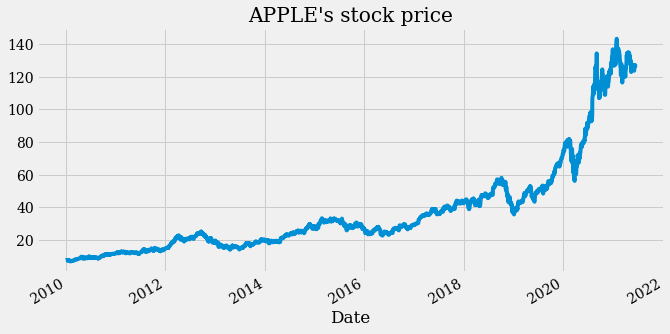

In [4]:
aapl_df['Close'].plot(title="APPLE's stock price")

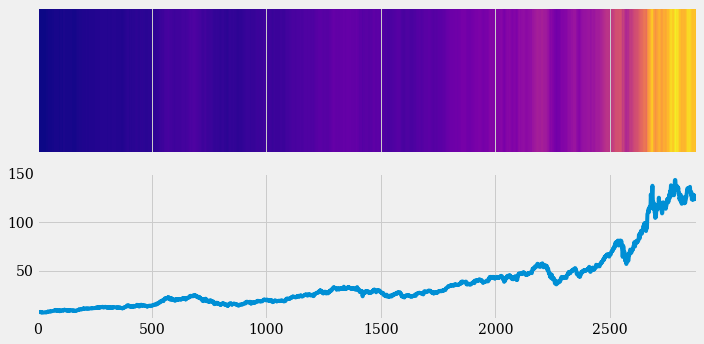

In [5]:


x = range(len(y))
#y = np.cumsum(np.random.randn(50))+6

fig, (ax,ax2) = plt.subplots(nrows=2, sharex=True)

extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
ax.imshow(y[np.newaxis,:], cmap="plasma", aspect="auto", extent=extent)
ax.set_yticks([])
ax.set_xlim(extent[0], extent[1])
ax2.plot(x,y)

plt.tight_layout()
plt.show()

In [6]:
import scipy.fft

In [7]:
yf = scipy.fft.fft(y)
xf = scipy.fft.fftfreq(len(yf), 1. / 365)

C:\Users\Kiril M\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


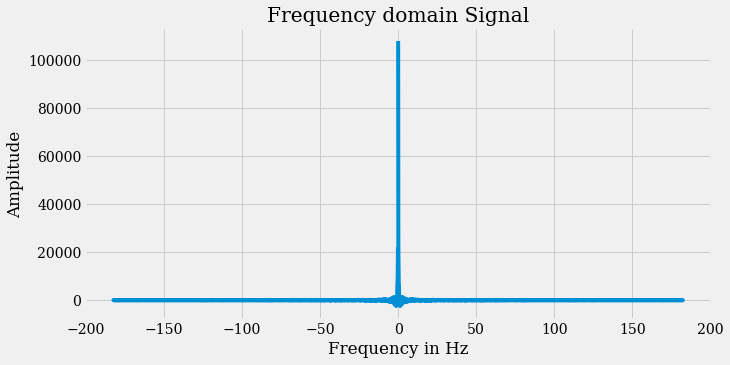

In [8]:
plt.plot(xf, yf)
plt.title('Frequency domain Signal')
plt.xlabel('Frequency in Hz')
plt.ylabel('Amplitude')
plt.show()

In [9]:
a = 5
arr = np.array(a)

In [10]:
print(arr.shape)


()


In [11]:
from numpy.fft import *

In [12]:
def Fourier_Filter(señal, threshold):
    '''
    Función para el Filtrado de una señal temporal con 
    transformada de Fourier. 
    Threshold-->
    '''
    fourier = rfft(señal)                                  ##Transformada de Fourier Directa
    frecuencias = rfftfreq(señal.size,d=20e-3/señal.size)  ##Obtenemos las frecuencias
    fourier[frecuencias > threshold] = 0                   ##Filtramos las frecuencias con Amplitud mayor que THRESHOLD
    return irfft(fourier)                                  ##Transformada de Fourier Inversa


In [13]:
threshold = 1e3
filtrado = Fourier_Filter(y,threshold=threshold)

In [14]:
import matplotlib
set([f.name for f in matplotlib.font_manager.fontManager.afmlist])

{'Computer Modern',
 'Courier',
 'Helvetica',
 'ITC Avant Garde Gothic',
 'ITC Bookman',
 'ITC Zapf Chancery',
 'ITC Zapf Dingbats',
 'New Century Schoolbook',
 'Palatino',
 'Symbol',
 'Times',
 'Utopia',
 'ZapfDingbats'}

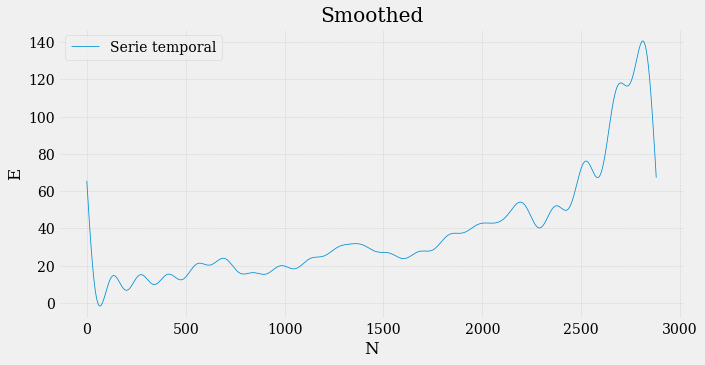

In [15]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1)
ax.plot(filtrado, linewidth = 0.8, label='Serie temporal')
ax.set_xlabel('N')
ax.set_ylabel('E')
ax.set_title('Smoothed')
ax.legend(loc='upper left')
ax.grid(True, linestyle = '--', linewidth = 0.5, color = 'grey', alpha = 0.3)

In [16]:
import os
path = os.getcwd()
print(path)
font_dirs = path + '/fonts'

d:\[3]--Python Workdir--[3]


In [17]:
print(os.listdir(font_dirs))

FileNotFoundError: [WinError 3] El sistema no puede encontrar la ruta especificada: 'd:\\[3]--Python Workdir--[3]/fonts'

In [18]:
from matplotlib import font_manager
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

In [22]:
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

In [23]:
plt.rcParams['font.family'] = 'Lobster'

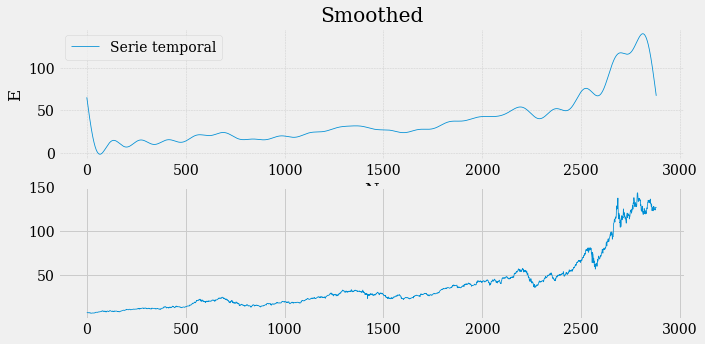

In [19]:
fig, (ax,ax2) = plt.subplots(2,1)
ax.plot(filtrado, linewidth = 0.8, label='Serie temporal')
ax.set_xlabel('N')
ax.set_ylabel('E')
ax.set_title('Smoothed')
ax.legend(loc='upper left')
ax.grid(True, linestyle = '--', linewidth = 0.5, color = 'grey', alpha = 0.3)
ax2.plot(y, linewidth = 0.8, label='Serie temporal sin filtrar')